# Implement AdaBoost

# 1. read data

In [1]:
# import function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import time
import math
import random
%matplotlib inline

In [2]:
SampleData_SavePath = "./data/A1.csv"

SampleData_pd = pd.DataFrame()
if not os.path.isfile(SampleData_SavePath):
    print(SampleData_SavePath, "is not existed.")
else :
    print(SampleData_SavePath, "is existed.")
    SampleData_pd = pd.read_csv(SampleData_SavePath)

print(SampleData_pd)
print(SampleData_pd.dtypes)

# 不能将-1 和 1的值变为0和1的值。
# def preprocessLabel(label):
#     if label == -1 :
#         return 0
#     else:
#         return 1

# SampleData_pd['label'] = SampleData_pd.apply(lambda x :preprocessLabel(x['label']), axis = 1)
# print(SampleData_pd)

./data/A1.csv is existed.
   number    x    y  label
0       1   80  144      1
1       2   93  232      1
2       3  136  275     -1
3       4  147  131     -1
4       5  159   69      1
5       6  214   31      1
6       7  214  152     -1
7       8  257   83      1
8       9  307   62     -1
9      10  307  231     -1
number    int64
x         int64
y         int64
label     int64
dtype: object


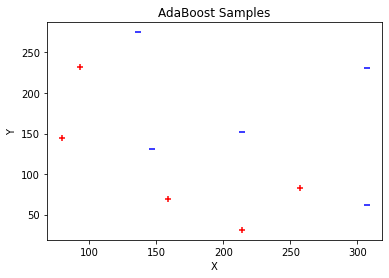

In [3]:
# display data
plt.title("AdaBoost Samples")
plt.xlabel('X')
plt.ylabel('Y')

for index, row in SampleData_pd.iterrows():
    if row['label'] == 1:
        plt.scatter(row['x'], row['y'], marker='+', color='red')
    else:
        plt.scatter(row['x'], row['y'], marker='_', color='blue')
plt.savefig("./pictures/samples.jpg")
plt.show()

In [4]:
# 先不要打乱，并将标签与数据分割出来。
# 分割的作用是方便与后面进行错误率的计算。这样混合在一起的数据集、单纯数据集、标签集都有了。
# Samples = SampleData_pd.sample(frac=1).copy()

Samples_data = SampleData_pd.iloc[:,:3].copy()
Labels_data = SampleData_pd.iloc[:,3].copy()

print(Samples_data)
print(Labels_data)
print(Labels_data.shape)

   number    x    y
0       1   80  144
1       2   93  232
2       3  136  275
3       4  147  131
4       5  159   69
5       6  214   31
6       7  214  152
7       8  257   83
8       9  307   62
9      10  307  231
0    1
1    1
2   -1
3   -1
4    1
5    1
6   -1
7    1
8   -1
9   -1
Name: label, dtype: int64
(10,)


# 2. complete train weak classifier

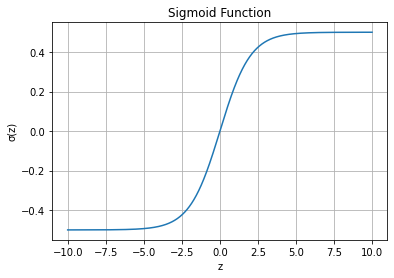

In [5]:
# common function
# activtion function 
def sigmoid(input):
    return (1.0/(1 + np.exp(-input)))-0.5

# display and survey/check/test sigmoid function
z = np.arange(-10, 10, 0.01)
fz = []
for zi in z:
    fz.append(sigmoid(zi))
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.plot(z, fz)
plt.grid()
plt.savefig("./pictures/sigmoid.jpg")
plt.show()

In [6]:
def displaySingleWeakClassifier(wc_type, samples, theta, error_rate, offset=10):
    """[summary]
    display single weak classifier information.
    Args:
        wc_type ([string]): ['x' or 'y']
        samples ([pd.DataFrame]): [sample data]
        theta ([float]): [weak classifier theta]
        error_rate ([float]): [this weak classifier error rate]
        offset (int, optional): [description]. Defaults to 10.
    """
    plt.title("AdaBoost Weak Classifier")
    plt.xlabel('X')
    plt.ylabel('Y')

    for index, row in samples.iterrows():
        if row['label'] == 1:
            plt.scatter(row['x'], row['y'], marker='+', color='red')
        else:
            plt.scatter(row['x'], row['y'], marker='_', color='blue')
    if wc_type == 'x':
        plt.axvline(theta)
        y_mean = samples['y'].mean()
        plt.text(theta + offset/2, y_mean, 'error rate =%0.2f\n theta =%0.2f'%(error_rate, theta))
    else:
        plt.axhline(theta)
        x_mean = samples['x'].mean()
        # 加了一个偏移量，避免显示的字和线条重合在一起。
        plt.text(x_mean, theta + offset, 'error rate =%0.2f\n theta =%0.2f'%(error_rate, theta))
    plt.show()

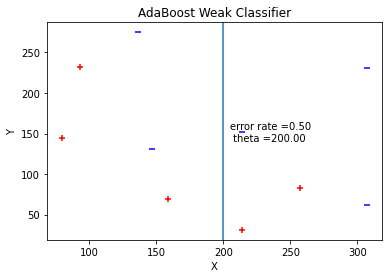

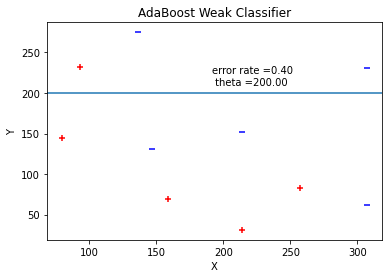

In [7]:
# 测试显示弱分类器的函数。
displaySingleWeakClassifier('x', SampleData_pd, 200, 0.5)

displaySingleWeakClassifier('y', SampleData_pd, 200, 0.4)

In [8]:
# 测试更新样本权重函数。
temp = Labels_data.copy()
temp[6] = 1
temp[2] = 1
temp[1] = -1
print(temp)
print(temp.shape[0])

def update_sample_weight(samples_weight_before, wc_weight, labels, prediction):
    """[summary]
    
    Args:
        samples_weight_before ([list]): [last time samples weight.]
        wc_weight ([float]): [current weak classifier weight]
        labels ([pd.DataFrame]): [labels]
        prediction ([list]): [current predict value]

    Returns:
        [list]: [description]
    """
    # 更新样本的权重。
    # print("--------u1---------")
    # print(samples_weight_before)
    new_samples_weight = []
    for i in range(len(labels)):
        new_samples_weight.append(samples_weight_before[i] * np.exp(-wc_weight * labels[i] * prediction[i]))
        pass
    # return np.array(new_samples_weight/sum(new_samples_weight)).reshape([len(labels) ,1])
    # 最终输出的结果是List.
    output = new_samples_weight/sum(new_samples_weight)
    # print(output)
    # print("--------u2---------")
    return output

samples_weight_before = [(1.0/(SampleData_pd.shape[0])) for i in range(Samples_data.shape[0])]
wc_weight = 0.8
print(update_sample_weight(samples_weight_before, wc_weight, Labels_data, temp))

0    1
1   -1
2    1
3   -1
4    1
5    1
6    1
7    1
8   -1
9   -1
Name: label, dtype: int64
10
[0.04574754 0.22658907 0.22658907 0.04574754 0.04574754 0.04574754
 0.22658907 0.04574754 0.04574754 0.04574754]


In [17]:
def WeakClassifier(input, theta):
    """[summary]
    define weak classifier function form.
    Args:
        input ([float]): [input sample value]
        theta ([float]): [weak classifier theta]

    Returns:
        [int]: [predict value]
    """
    temp = sigmoid((input - theta))
    if temp >= 0:
        Predict_Label = -1
    else:
        Predict_Label = 1
    return Predict_Label

class FindSingleWeakClassifierClass:
    """[summary]
    最终是需要输出一个弱分类器的形式。所以中间对数据集都以list的形式来处理。
    Returns:
        [type]: [description]
    """
    # step_size, 
    def __init__(self, wc_function, samples, labels, step_number=0):
        """[summary]
        samples_weight, 
        wc_type, 
        Args:
            wc_function ([function pointer]): [define weak classifier function form.]
            samples ([pd.DataFrame]): [samples data]
            labels ([pd.DataFrame]): [labels data]
            step_size ([float]): [step size]
            step_number ([float]): [step number]
            wc_type ([int:0|1]): [weak classifier type. in this example, 
                                    it means x or y.]
        """
        self.wc_function = wc_function
        # 这里不对，直接按照x或者y的类型，来计算对比的方向。
        # self.samples = samples
        self.labels = labels.tolist()
        # self.wc_type = wc_type
        # self.samples_weight = samples_weight
        self.step_number = step_number
        
        # 首先把输入的samples dataframe存下来，然后再处理为list的形式。
        # 这个temp_samples只是缓存用的。真正在后面计算的是使用的self.samples。
        self.temp_samples = samples
        self.samples = []
        # self.selected_theta_list = selected_theta_list
        # , selected_theta_list

    def according_to_wctype_proecess_data(self, wc_type):
        """[summary]
        generate step, step size, samples_list according to wc_type.
        Args:
            wc_type ([string]): ['x' or 'y']
        """
        # 并不需要将wc_type存储为self.wc_type，直接在每次对weakclassifier进行循环的时候输入一次即可。
        if wc_type == 'x':
            self.samples = self.temp_samples['x'].tolist()
            xMax = max(self.samples)
            xMin = min(self.samples)
            if self.step_number == 0:
                # calculate weakclassifier step if no step_number is inputted.
                self.step_number = self.temp_samples.shape[0]
            self.StepSize = (xMax - xMin) / self.step_number
        else:
            self.samples = self.temp_samples['y'].tolist()
            yMax = max(self.samples)
            yMin = min(self.samples)
            if self.step_number == 0:
                # calculate weakclassifier step if no step_number is inputted.
                self.step_number = self.temp_samples.shape[0]
            self.StepSize = (yMax - yMin) / self.step_number
        
    def predictSamples(self, theta):
        """[summary]
        predict labels according to samples.
        Args:
            theta ([float]): [current wc theta value.]

        Returns:
            [list]: [predict result.]
        """
        # prediction = pd.DataFrame(np.zeros((10,1)))
        # for index, row in self.samples.iterrows():
        #     self.wc_function(row, theta)
        prediction = [0 for i in range(len(self.samples))]
        for i in range(len(self.samples)):
            prediction[i] = self.wc_function(self.samples[i], theta)
        return prediction
    
    def choose_error_rate(self, selected_error_rate_location, error_rate_list):
        """[summary]
        the method of choose error rate . 
        in the book,the method is when error rate >= 0.5, should stop find the best wc.
        but maybe has some problem. so, the following method are used.
        Args:
            selected_error_rate_location ([type]): [input location of selected error_rate
                也就是传入的是error_rate_list中已经被选择过的下标。
                对应的意义在于传入的是已经被选择过的wc的，已经选择过的不再选择。]
            error_rate_list ([type]): [description]

        Returns:
            minvalue ([float]): [description]
            minIndex ([int]): [description]
        """
        # 计算两个集合的差集，然后再从差集中选择出最小的值作为返回值。
        # print(selected_error_rate)
        # print(error_rate_list)
        error_rate_list_location = list(range(len(error_rate_list)))
        # 已经选择过wc，将不在选取。
        minIndex_list = list(set(error_rate_list_location).difference(set(selected_error_rate_location)))
        # 先将第一个值赋值给min_value，然后通过它寻找最小的一个值。
        min_value = error_rate_list[minIndex_list[0]]
        for tempindex in minIndex_list:
            if error_rate_list[tempindex] < min_value:
                min_value = error_rate_list[tempindex]
                minIndex = tempindex
        print(min_value)
        # 如果选择的wc的错误率依然大于0.5，那么将取全局最小值作为替补。
        if error_rate_list[minIndex] >= 0.5:
            minvalue = min(error_rate_list)
            minIndex = error_rate_list.index(minvalue)
            return minIndex
        else:
            return minIndex

    def calculate_wc_weight(self, error_rate):
        """[summary]

        Args:
            error_rate ([float]): [current wc error rate]

        Returns:
            [float]: [current wc weight]
        """
        wc_weight = 0.5 * math.log((1-error_rate)/error_rate)
        return wc_weight
    
    def calculate_Error_rate(self, labels, pred, sample_weight):
        # 计算弱分类器的错误率。
        ret = 0
        for i in range(len(labels)):
            if labels[i] != pred[i]:
                ret += sample_weight[i]
        return ret
    
    # def update_sample_weight(self, old_samples_weight, wc_weight, labels, prediction):
    #     # 更新样本的权重。
    #     new_samples_weight = []
    #     for i in range(len(labels)):
    #         new_samples_weight.append(old_samples_weight[i] * np.exp(-wc_weight * labels[i] * prediction[i]))
    #         pass
    #     return np.array(new_samples_weight/sum(new_samples_weight)).reshape([len(labels) ,1])
    
    def FindSingleWeakClassifier(self, new_samples_weight, wc_type, selected_error_rate_list_location=[]):
        """[summary]
        the main part of FindSingleWeakClassifier class.
        find the best weak classifier.
        Args:
            new_samples_weight ([list]): [description]
            wc_type ([float]): [description]
            selected_error_rate_list_location (list, optional): 
                [exclude selected error rate location.]. Defaults to [].

        Returns:
            [type]: [description]
            temp_theta[location] ([float]): [description]
            temp_error_rate[location] ([float]): [description]
            temp_prediction ([list]): [description]
            temp_wc_weight[location] ([float]): [description]
        """
        location = -1
        temp_theta = []
        temp_error_rate = []
        temp_prediction = []
        temp_wc_weight = []
        # 初始时，样本的权重是平均值。
        # init_samples_weight = [(1.0/(self.samples.shape[0])) for i in range(self.samples.shape[0])]
        
        # 按照输入的弱分类器类型，生成指定的样本。
        self.according_to_wctype_proecess_data(wc_type)
        # print("xxx------------")
        # print(new_samples_weight)
        for i in range(self.step_number):
            # 按照步长来训练弱分类器。
            theta = i * self.StepSize
            temp_theta.append(theta)
            temp_prediction = self.predictSamples(theta)
            
            single_error_rate = self.calculate_Error_rate(self.labels, temp_prediction, new_samples_weight)
            temp_error_rate.append(single_error_rate)
            temp_wc_weight.append(self.calculate_wc_weight(single_error_rate))
            
            # if single_error_rate >= 0.5:
            #     location = i
            #     break
        print("---1---")
        # print(selected_error_rate_list_location)
        # # 通过错误率来选择的wc函数。
        # print(temp_error_rate)
        # print(temp_theta)
        
        minIndex= self.choose_error_rate(selected_error_rate_list_location, temp_error_rate)
        # location = temp_error_rate.index(min(temp_error_rate))
        location = minIndex
        print(location)
        # print(location)
        # print(temp_error_rate[location])
        # print(temp_theta[location])
        print("---2---")
        # temp_error_rate[location]
        return temp_theta[location], location, temp_prediction, temp_wc_weight[location]


---1---
0
---2---
theta = 0.0


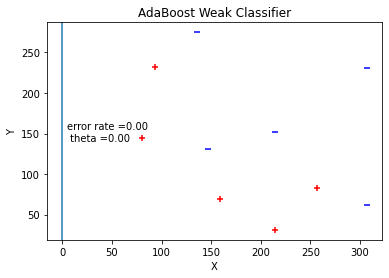

In [10]:
# 测试单个弱分类器的生成函数。
samples_weight = [(1.0/(Samples_data.shape[0])) for i in range(Samples_data.shape[0])]

getWCClass = FindSingleWeakClassifierClass(WeakClassifier, Samples_data, Labels_data)
theta, error_rate, predictionresult, wc_weight = getWCClass.FindSingleWeakClassifier(samples_weight, 'x')
print("theta = " + str(theta))
displaySingleWeakClassifier('x', SampleData_pd, theta, error_rate)

---1---
0
---2---
0.0


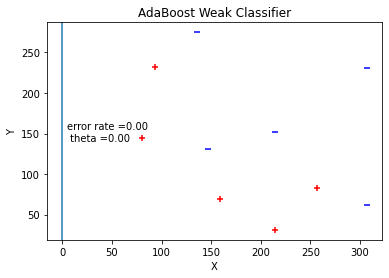

-----------1---------
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
-----------2---------
0.0
-----------3---------
0    1
1    1
2   -1
3   -1
4    1
5    1
6   -1
7    1
8   -1
9   -1
Name: label, dtype: int64
-----------4---------
[1, -1, -1, 1, 1, 1, 1, 1, 1, -1]
-----------5---------
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [11]:
# 测试找到的弱分类函数是否正确。
wc_weight_list = []

samples_weight = [(1.0/(Samples_data.shape[0])) for i in range(Samples_data.shape[0])]

getWCClass = FindSingleWeakClassifierClass(WeakClassifier, Samples_data, Labels_data)
theta, error_rate, predictionresult, wc_weight = getWCClass.FindSingleWeakClassifier(samples_weight, 'y')
print(theta)
displaySingleWeakClassifier('x', SampleData_pd, theta, error_rate)

print("-----------1---------")
print(samples_weight)
print("-----------2---------")
print(wc_weight)
print("-----------3---------")
print(Labels_data)
print("-----------4---------")
print(predictionresult)
print("-----------5---------")
new_samples_weight = update_sample_weight(samples_weight, wc_weight, Labels_data, predictionresult)
print(new_samples_weight)

# 3. implement final adaboost 

In [12]:
# display multiple weak classifier
def displayMultipleWC(theta_list, wc_weight_list, wc_type_list, error_rate_list, samples, offset=10):
    i = 0
    plt.title("AdaBoost Multiple Weak Classifier")
    plt.xlabel('X')
    plt.ylabel('Y')

    for index, row in samples.iterrows():
        if row['label'] == 1:
            plt.scatter(row['x'], row['y'], marker='+', color='red')
        else:
            plt.scatter(row['x'], row['y'], marker='_', color='blue')
    for i in range(len(theta_list)):
        if wc_type_list[i] == 'x':
            plt.axvline(theta_list[i])
            y_mean = samples['y'].mean()
            plt.text(theta_list[i] + offset/2, y_mean, 
                     '[%d] error rate =%0.2f\n theta =%0.2f'%(i, error_rate_list[i], theta_list[i]))
        else:
            plt.axhline(theta_list[i])
            x_mean = samples['x'].mean()
            # 加了一个偏移量，避免显示的字和线条重合在一起。
            plt.text(x_mean, theta_list[i] + offset, 
                     '[%d] error rate =%0.2f\n theta =%0.2f'%(i, error_rate_list[i], theta_list[i]))
    
    output_info = "[weak classifier weight] = "
    i = 0
    for wc_weight in wc_weight_list:
        if i+1 == len(wc_weight_list):
            output_info += "(" + str(wc_weight) + ")"
        else:
            output_info += "(" + str(wc_weight) + ")" + " + "
        i += 1
    print(output_info)
    plt.show()

In [18]:
class FinalClassifierClass:
    def __init__(self, Samples_data, Labels_data, weak_classifier_count = 3):
        self.samples = Samples_data
        self.labels = Labels_data
        self.theta_list = []
        self.wc_weight_list = []
        self.wc_type_list = []
        self.error_rate_list = []
        self.weak_classifier_count = weak_classifier_count
        pass
    
    def final_classifier(self, x, y):
        realSum = 0
        classification = 0
        temp_hxMa = 0
        for i in range(self.weak_classifier_count):
            if self.wc_type_list[i] == 'x':
                temp_hxMa = self.wc_weight_list[i] * WeakClassifier(x, self.theta_list[i])
            else:
                temp_hxMa = self.wc_weight_list[i] * WeakClassifier(y, self.theta_list[i])
            realSum += temp_hxMa
        print("The classifier f(x) value is: " + str(realSum))
        classification = self.sgn(realSum)
        return classification

    def sgn(self, input):
        if input >= 0 :
            return 1
        else:
            return -1

    def train_fc(self):
        """[summary]
        the real return has three result. first is self.wc_type_list, second is self.theta_list, 
        third is self.wc_weight_list.  they are all used to final_classifier.
        """
        theta = 0
        error_rate_location = 0
        selected_error_rate_list_location = []
        # init_samples_weight = [(1.0/(self.samples.shape[0])) for i in range(self.samples.shape[0])]
        getWCClass = FindSingleWeakClassifierClass(WeakClassifier, self.samples, self.labels)
        # 将样本的权重初始化。
        new_samples_weight = [(1.0/(self.samples.shape[0])) for i in range(self.samples.shape[0])]
        for i in range(self.weak_classifier_count):
            # 随机决定生成的弱分类器类型。
            # if random.randint(0,1) == 0:
            #     classifierType = 'x'
            # else:
            #     classifierType = 'y'
            
            if i == 0 :
                classifierType = 'x'
            elif i == 1:
                classifierType = 'x'
            else:
                classifierType = 'y'
            
            self.wc_type_list.append(classifierType)
            # print("---ct---:" + classifierType)
            # print(new_samples_weight)
            # print(sum(new_samples_weight))
            theta, error_rate_location, predictionresult, wc_weight = \
                                    getWCClass.FindSingleWeakClassifier(new_samples_weight,
                                                                        classifierType, 
                                                                        selected_error_rate_list_location)
            new_samples_weight = update_sample_weight(samples_weight, wc_weight, 
                                                        self.labels, predictionresult)
            # print(predictionresult)
            # print((self.labels).to_list())
            selected_error_rate_list_location.append(error_rate_location)
            self.theta_list.append(theta)
            self.wc_weight_list.append(wc_weight)
            self.error_rate_list.append(error_rate)
        # print(len(self.wc_type_list), len(self.theta_list), len(self.wc_weight_list))

In [19]:

weak_classifier_count = 3
FCC = FinalClassifierClass(Samples_data, Labels_data, weak_classifier_count)
FCC.train_fc()
sampleType = FCC.final_classifier(147, 131)
print("classifier type is :" + str(sampleType))

---1---
0.30000000000000004
5
---2---
---1---
0.4347826086956522
4
---2---
---1---
0.29464285714285715
6
---2---
The classifier f(x) value is: -0.11836091692707656
classifier type is :-1


In [21]:
sampleType = FCC.final_classifier(257, 83)
print("classifier type is :" + str(sampleType))

The classifier f(x) value is: -0.11836091692707656
classifier type is :-1


In [24]:
sampleType = FCC.final_classifier(80, 144)
print("classifier type is :" + str(sampleType))

The classifier f(x) value is: 0.9913012079276178
classifier type is :1


[weak classifier weight] = (0.4236489301936017) + (0.13118213223374545) + (0.4364701455002706)


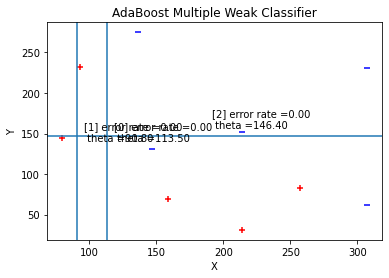

In [20]:
displayMultipleWC(FCC.theta_list, FCC.wc_weight_list, FCC.wc_type_list, FCC.error_rate_list, SampleData_pd)